In [4]:
# import neccessary packages

import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import pylab as plt
plt.rcParams['figure.figsize'] = [10, 6]
from imblearn.over_sampling import SMOTE, ADASYN, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler, TomekLinks, ClusterCentroids
from collections import Counter
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, precision_recall_curve, auc
from sklearn.preprocessing import RobustScaler, MinMaxScaler
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split, KFold, RandomizedSearchCV, GridSearchCV, train_test_split
from sklearn import naive_bayes
from sklearn.naive_bayes import GaussianNB
from sklearn import neighbors
import xgboost as xgb
from xgboost import XGBClassifier
from mlxtend.classifier import StackingClassifier
from tabulate import tabulate
from imblearn.over_sampling import SMOTE
import category_encoders as ce
from sklearn.utils import resample, shuffle
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neural_network import MLPClassifier
from prettytable import PrettyTable 
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from matplotlib.cm import viridis
from sklearn.pipeline import Pipeline
colors = viridis(np.linspace(0, 1, 4))
import joblib

## Exploratory Data Analysis

In [21]:
# load data
df = pd.read_csv('survey_lung_cancer.csv')
df.head(10)

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
5,F,75,1,2,1,1,2,2,2,2,1,2,2,1,1,YES
6,M,52,2,1,1,1,1,2,1,2,2,2,2,1,2,YES
7,F,51,2,2,2,2,1,2,2,1,1,1,2,2,1,YES
8,F,68,2,1,2,1,1,2,1,1,1,1,1,1,1,NO
9,M,53,2,2,2,2,2,1,2,1,2,1,1,2,2,YES


In [22]:
# view data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [23]:
# number of observations
len(df)

309

In [24]:
# number of features
len(df.columns)

16

In [25]:
# check for null values
df.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

In [26]:
# 5 number summary of variables
df.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634
std,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


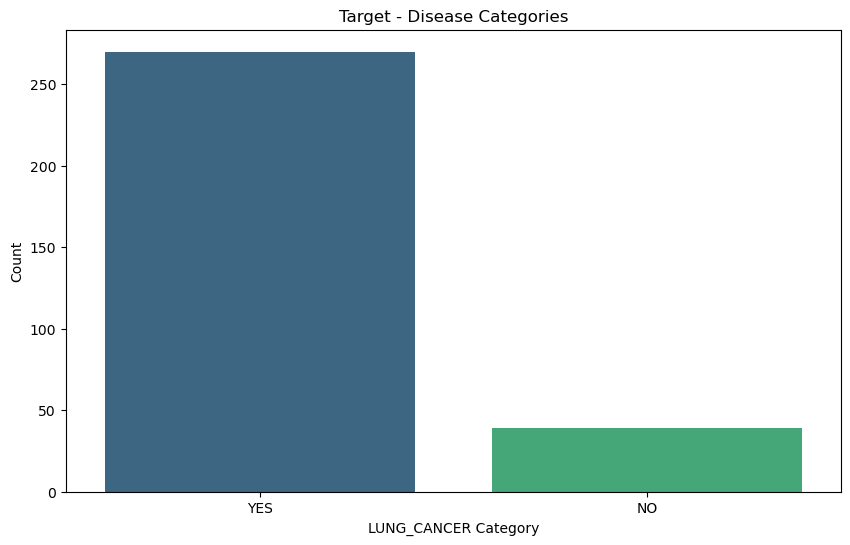

LUNG_CANCER
YES    270
NO      39
Name: count, dtype: int64


In [27]:
# visualize independent variable
plt.figure(figsize=(10, 6))  
sns.countplot(x='LUNG_CANCER', data=df, palette='viridis')
plt.xlabel('LUNG_CANCER Category')
plt.ylabel('Count')
plt.title('Target - Disease Categories')
plt.show()

print(df['LUNG_CANCER'].value_counts())

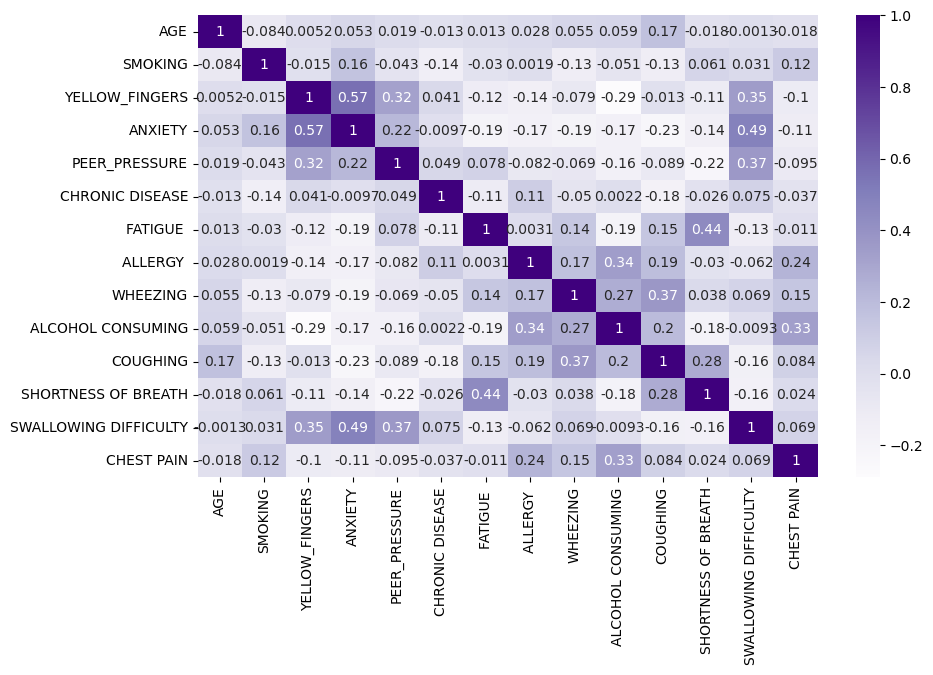

In [28]:
data = df
numeric_data = data.select_dtypes(include=[float, int])
cor_matrix = numeric_data.corr()
sns.heatmap(cor_matrix, annot=True, cmap = "Purples")
plt.show()

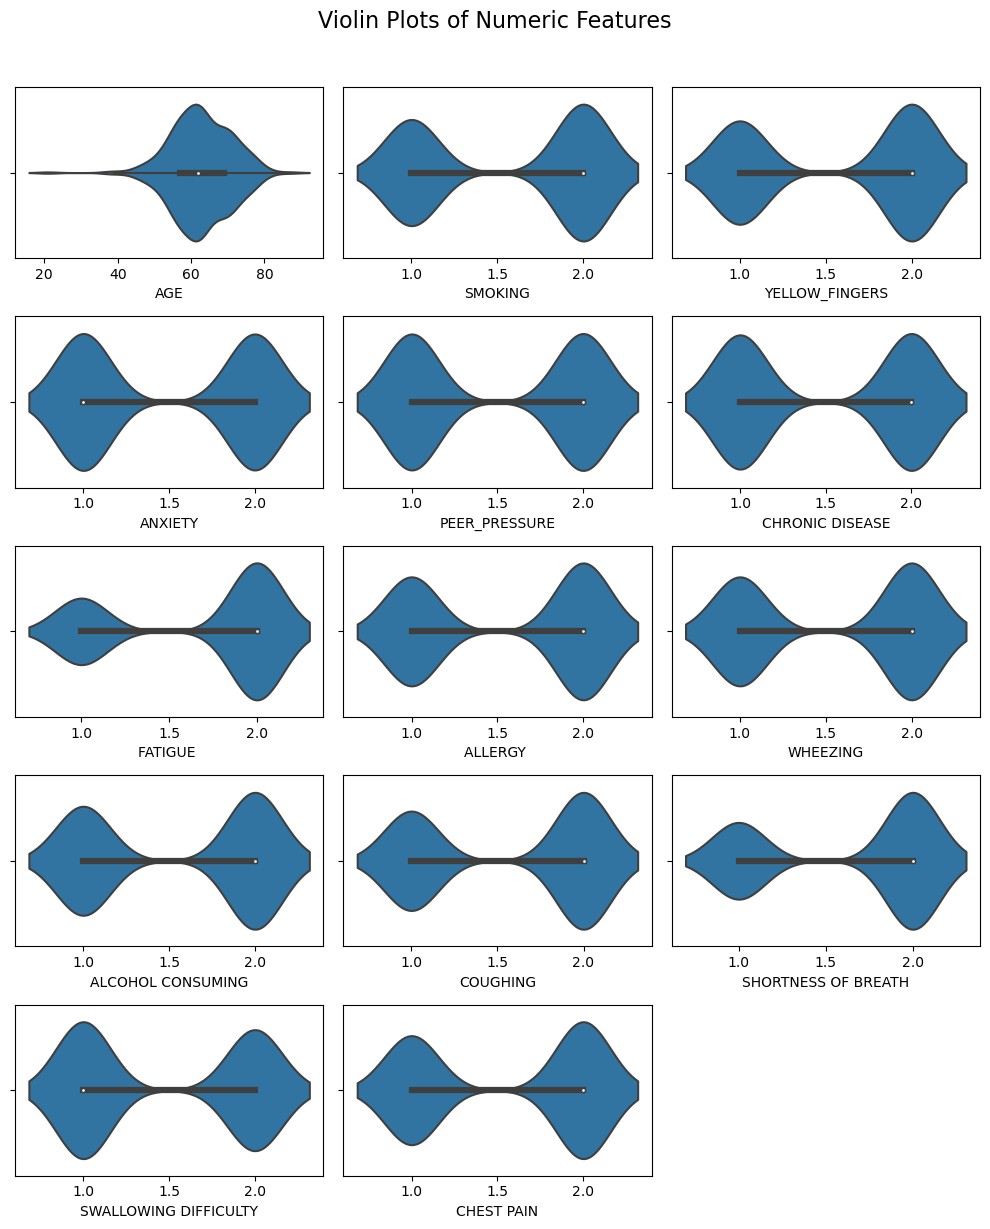

In [29]:
num_features = len(numeric_data.columns)
num_rows = 5
num_cols = (num_features - 1) // num_rows + 1

plt.figure(figsize=(10, 12))

for i, feature in enumerate(numeric_data.columns):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.violinplot(x=numeric_data[feature])

plt.suptitle('Violin Plots of Numeric Features', y=1.02, fontsize=16)
plt.tight_layout()
plt.show()

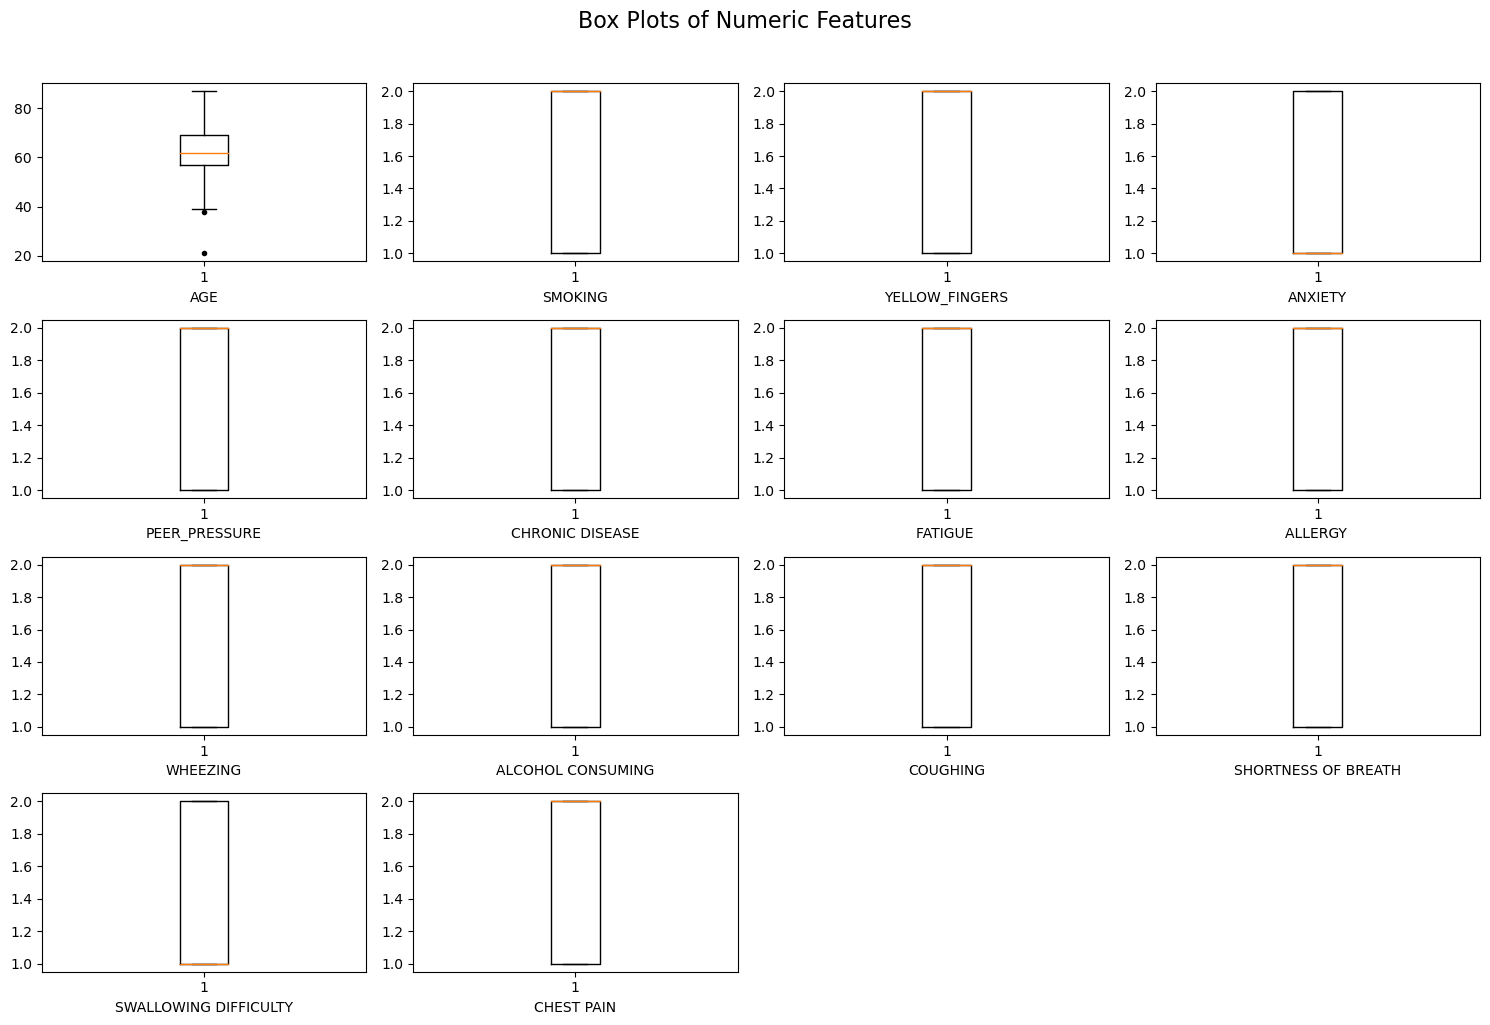

In [30]:
data_num = data.select_dtypes(include=[float, int])

num_features = len(data_num.columns)
num_rows = 4
num_cols = (num_features - 1) // num_rows + 1

plt.figure(figsize=(15, 10))

for i, feature in enumerate(data_num.columns):
    plt.subplot(num_rows, num_cols, i + 1)
    plt.boxplot(x=data_num[feature], sym='k.')
    plt.xlabel(feature)

plt.suptitle('Box Plots of Numeric Features', y=1.02, fontsize=16)
plt.tight_layout()
plt.show()

## Splitting the Data

In [31]:
# Replace values in the 'gender' column
gender = {'M': 1, 'F': 0}
outcome_col = {'YES': 1, 'NO': 0}
data['GENDER'] = data['GENDER'].replace(gender)
data['LUNG_CANCER'] = data['LUNG_CANCER'].replace(outcome_col)

data.head(10)

C:\Users\gabby\AppData\Local\Temp\ipykernel_20596\4272211972.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['GENDER'] = data['GENDER'].replace(gender)
C:\Users\gabby\AppData\Local\Temp\ipykernel_20596\4272211972.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['LUNG_CANCER'] = data['LUNG_CANCER'].replace(outcome_col)


,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,0,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,0,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0
5,0,75,1,2,1,1,2,2,2,2,1,2,2,1,1,1
6,1,52,2,1,1,1,1,2,1,2,2,2,2,1,2,1
7,0,51,2,2,2,2,1,2,2,1,1,1,2,2,1,1
8,0,68,2,1,2,1,1,2,1,1,1,1,1,1,1,0
9,1,53,2,2,2,2,2,1,2,1,2,1,1,2,2,1


In [32]:
Y = data["LUNG_CANCER"]
X = data.drop(["LUNG_CANCER"], axis=1)

In [33]:
Y.head()

0    1
1    1
2    0
3    0
4    0
Name: LUNG_CANCER, dtype: int64

In [34]:
X.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2
2,0,59,1,1,1,2,1,2,1,2,1,2,2,1,2
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2
4,0,63,1,2,1,1,1,1,1,2,1,2,2,1,1


In [35]:
# Split data into an 70% train, 30% test set with the remaining data

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42, stratify=Y)

In [36]:
print("Train set size:", X_train.shape[0])
print("Test set size:", X_test.shape[0])

Train set size: 216
Test set size: 93


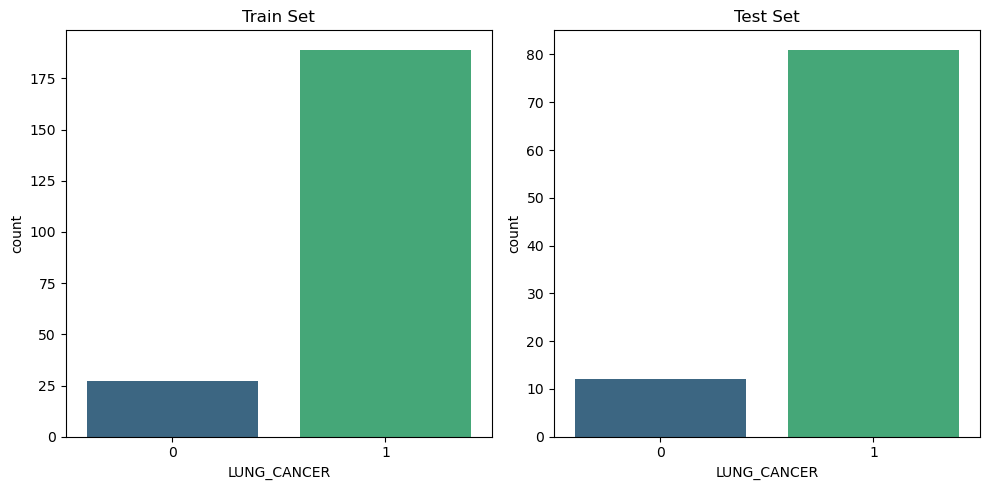

In [37]:
# Plotting the class distribution for y_train and y_test
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.countplot(x=y_train, palette="viridis")
plt.title("Train Set")

plt.subplot(1, 2, 2)
sns.countplot(x=y_test, palette="viridis")
plt.title("Test Set")

plt.tight_layout()
plt.show()

## SMOTE

In [38]:
# Instantiate SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data only
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

X_train = X_resampled
y_train = y_resampled

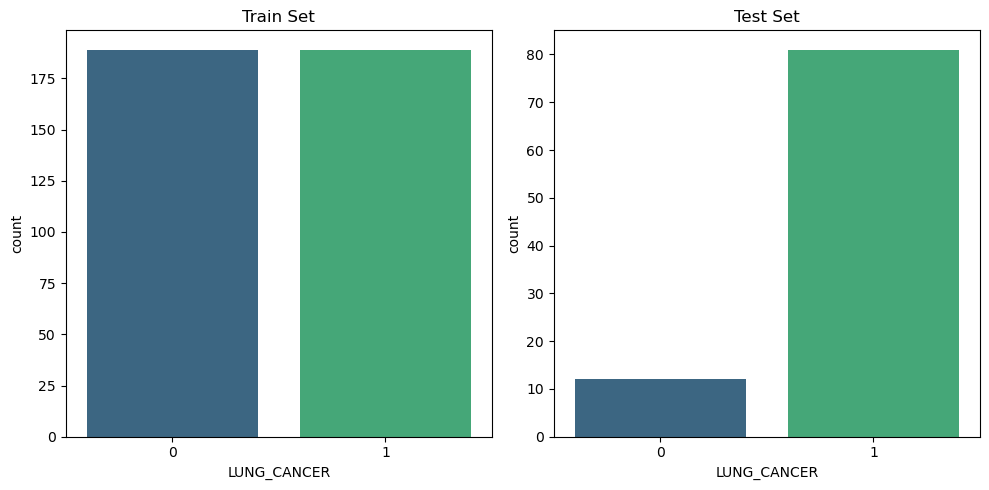

In [39]:
# Plotting the class distribution for y_train and y_test after SMOTE
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.countplot(x=y_train, palette="viridis")
plt.title("Train Set")

plt.subplot(1, 2, 2)
sns.countplot(x=y_test, palette="viridis")
plt.title("Test Set")

plt.tight_layout()
plt.show()

In [40]:
print("Train set size:", X_train.shape[0])
print("Test set size:", X_test.shape[0])

Train set size: 378
Test set size: 93


## Feature Selection

In [41]:
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [42]:
feature_importances = tree_model.feature_importances_

In [43]:
sorted_indices = feature_importances.argsort()[::-1]

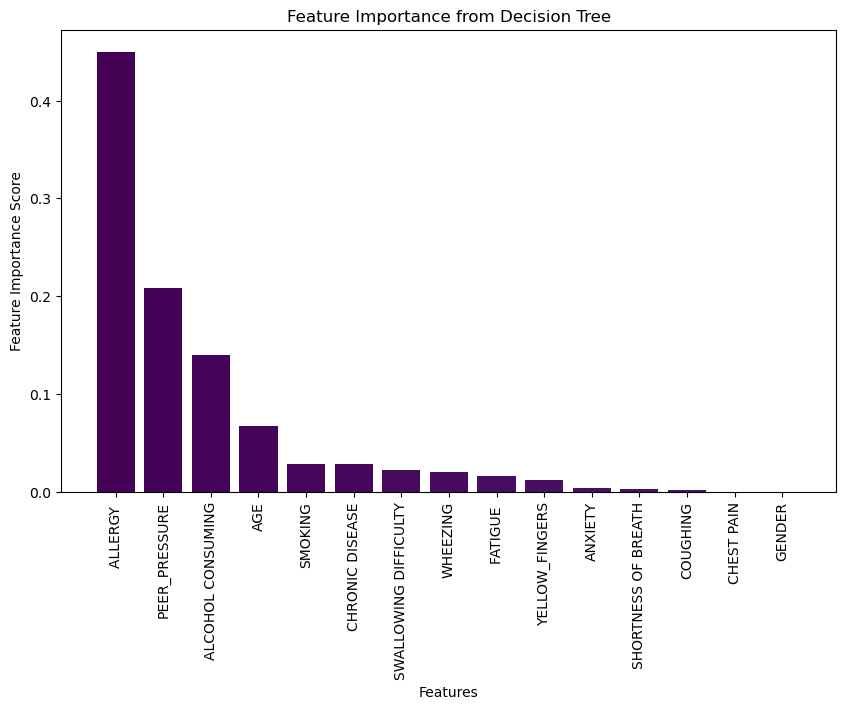

In [44]:
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importances)), feature_importances[sorted_indices], align='center', color=plt.cm.viridis(range(len(feature_importances))))
plt.xticks(range(len(feature_importances)), X_train.columns[sorted_indices], rotation=90)
plt.xlabel('Features')
plt.ylabel('Feature Importance Score')
plt.title('Feature Importance from Decision Tree')
plt.show()

### Keeping only important features

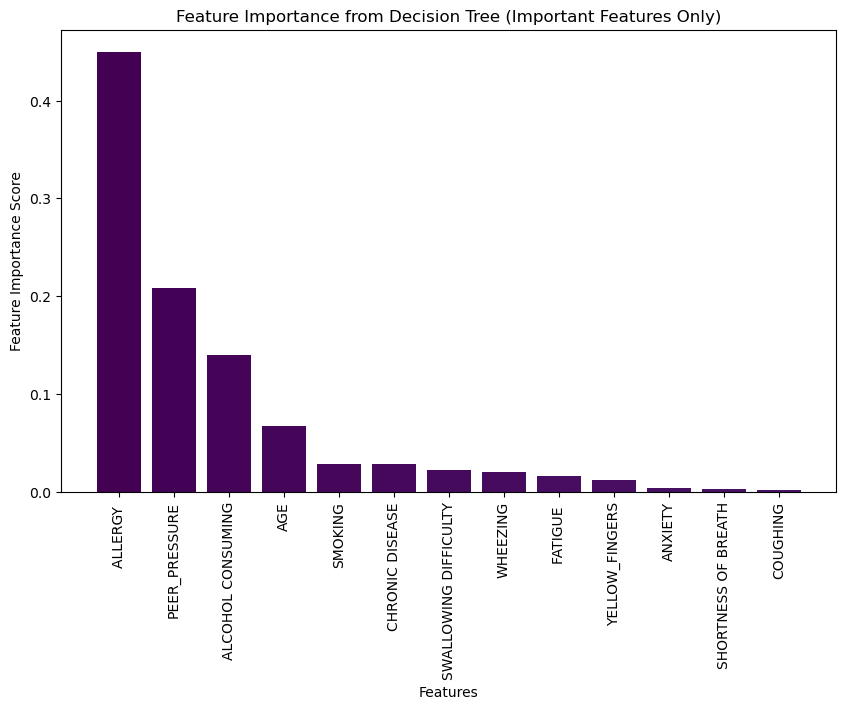

In [45]:
threshold = 0.001

important_feature_indices = sorted_indices[feature_importances[sorted_indices] > threshold]

important_features = X_train.columns[important_feature_indices]

X_train = X_train.iloc[:, important_feature_indices]
X_test = X_test.iloc[:, important_feature_indices]

plt.figure(figsize=(10, 6))
plt.bar(range(len(important_features)), 
        feature_importances[important_feature_indices], 
        align='center', color=plt.cm.viridis(range(len(feature_importances))))
plt.xticks(range(len(important_features)), 
           important_features, 
           rotation=90)
plt.xlabel('Features')
plt.ylabel('Feature Importance Score')
plt.title('Feature Importance from Decision Tree (Important Features Only)')
plt.show()

In [46]:
print("Train set size:", X_train.shape[0])
print("Test set size:", X_test.shape[0])

Train set size: 378
Test set size: 93


## Model building (NO TUNING)

### Neural Net

In [168]:
mlp_classifier = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)
mlp_classifier.fit(X_train, y_train)
y_pred_nn = mlp_classifier.predict(X_test)

accuracy_nn = accuracy_score(y_test, y_pred_nn)

precision_nn = precision_score(y_test, y_pred_nn, average='weighted')

recall_nn = recall_score(y_test, y_pred_nn, average='weighted')

f1_nn = f1_score(y_test, y_pred_nn, average='weighted')

### SVM

In [169]:
svm_classifier = SVC(kernel='rbf', C=1.0, random_state=42)
svm_classifier.fit(X_train, y_train)
y_pred_svm = svm_classifier.predict(X_test)

accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm, average='weighted')
recall_svm = recall_score(y_test, y_pred_svm, average='weighted')
f1_svm = f1_score(y_test, y_pred_svm, average='weighted')

### Random Forest

In [170]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)
y_pred_rf = rf_classifier.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')

### XGB

In [171]:

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)
dtrain = xgb.DMatrix(X_train, label=y_train_encoded)
dtest = xgb.DMatrix(X_test, label=y_test_encoded)

model = xgb.train({}, dtrain)
y_pred = model.predict(dtest)
y_pred_xgb = label_encoder.inverse_transform(y_pred.astype(int))

accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb, average='weighted', zero_division=1)
recall_xgb = recall_score(y_test, y_pred_xgb, average='weighted', zero_division=1)
f1_xgb = f1_score(y_test, y_pred_xgb, average='weighted', zero_division=1)

### Model Results

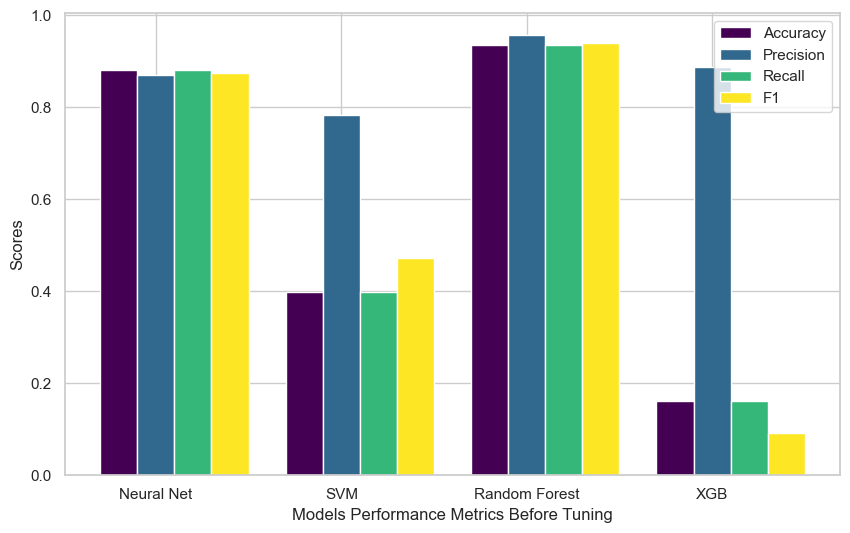

In [172]:
# create data 
x = np.arange(4) 
acc = [accuracy_nn, accuracy_svm, accuracy_rf, accuracy_xgb] 
prec = [precision_nn, precision_svm, precision_rf, precision_xgb] 
rec = [recall_nn, recall_svm, recall_rf, recall_xgb] 
f = [f1_nn, f1_svm, f1_rf, f1_xgb] 
width = 0.2


  
# plot data in grouped manner of bar type 
plt.bar(x-0.2, acc, width, color=colors[0]) 
plt.bar(x, prec, width, color=colors[1]) 
plt.bar(x+0.2, rec, width, color=colors[2]) 
plt.bar(x+0.4, f, width, color=colors[3]) 
plt.xticks(x, ['Neural Net', 'SVM', 'Random Forest', 'XGB']) 
plt.xlabel("Models Performance Metrics Before Tuning") 
plt.ylabel("Scores") 
plt.legend(["Accuracy", "Precision", "Recall", "F1"]) 
plt.show()


In [173]:
myTable = PrettyTable(["Model Name", "Accuracy", "Precision", "Recall", "F1"]) 

myTable.add_row(["Neural Net", accuracy_nn, precision_nn, recall_nn, f1_nn ]) 
myTable.add_row(["SVM", accuracy_svm, precision_svm, recall_svm, f1_svm]) 
myTable.add_row(["Random Forest", accuracy_rf, precision_rf, recall_rf, f1_rf]) 
myTable.add_row(["XGB", accuracy_xgb, precision_xgb, recall_xgb, f1_xgb])

print(myTable)

+---------------+---------------------+--------------------+---------------------+---------------------+
|   Model Name  |       Accuracy      |     Precision      |        Recall       |          F1         |
+---------------+---------------------+--------------------+---------------------+---------------------+
|   Neural Net  |  0.8817204301075269 | 0.8700716845878137 |  0.8817204301075269 |  0.8743471582181258 |
|      SVM      |  0.3978494623655914 | 0.7826001955034213 |  0.3978494623655914 | 0.47179777400490464 |
| Random Forest |  0.9354838709677419 | 0.956989247311828  |  0.9354838709677419 |  0.9406947890818859 |
|      XGB      | 0.16129032258064516 | 0.8881720430107526 | 0.16129032258064516 | 0.09257251287611819 |
+---------------+---------------------+--------------------+---------------------+---------------------+


## Model building (WITH TUNING)

### Neural Net

In [73]:
mlp_classifier = MLPClassifier(max_iter=2000, random_state=42)

param_grid = {
    'mlp__hidden_layer_sizes': [(100, 50), (50, 25)],
    'mlp__solver': ['adam', 'sgd'],
    'mlp__alpha': [0.0001, 0.001, 0.01],
    'mlp__learning_rate': ['constant', 'adaptive'],
}

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('mlp', mlp_classifier) 
])

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

best_mlp_classifier = grid_search.best_estimator_
y_pred_nn_cv = best_mlp_classifier.predict(X_test)

accuracy_nn = accuracy_score(y_test, y_pred_nn_cv)
precision_nn = precision_score(y_test, y_pred_nn_cv, average='weighted')
recall_nn = recall_score(y_test, y_pred_nn_cv, average='weighted')
f1_nn = f1_score(y_test, y_pred_nn_cv, average='weighted')

### SVM

In [50]:
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [0.1, 0.01, 0.001],
    'kernel': ['rbf', 'linear']
}

svm_classifier = SVC(random_state=42, probability=True)

grid_search = GridSearchCV(svm_classifier, param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

best_svm_classifier = grid_search.best_estimator_
y_pred_svm_cv = best_svm_classifier.predict(X_test)

accuracy_svm = accuracy_score(y_test, y_pred_svm_cv)
precision_svm = precision_score(y_test, y_pred_svm_cv, average='weighted')
recall_svm = recall_score(y_test, y_pred_svm_cv, average='weighted')
f1_svm = f1_score(y_test, y_pred_svm_cv, average='weighted')

## Export stacked model for Streamlit

In [51]:
joblib.dump(best_svm_classifier, 'best_lung_model.pkl')

['best_lung_model.pkl']

### Random Forest

In [75]:
rf_classifier = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=3)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

y_pred_rf_cv = best_model.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf_cv)
precision_rf = precision_score(y_test, y_pred_rf_cv, average='weighted')
recall_rf = recall_score(y_test, y_pred_rf_cv, average='weighted')
f1_rf = f1_score(y_test, y_pred_rf_cv, average='weighted')

### XGB

In [76]:
label_encoder = LabelEncoder()

y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

xgb_classifier = XGBClassifier()

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001]
}

grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid, cv=3)
grid_search.fit(X_train, y_train_encoded)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)
y_pred_xgb_cv = label_encoder.inverse_transform(y_pred)

accuracy_xgb = accuracy_score(y_test, y_pred_xgb_cv)
precision_xgb = precision_score(y_test, y_pred_xgb_cv, average='weighted', zero_division=1)
recall_xgb = recall_score(y_test, y_pred_xgb_cv, average='weighted', zero_division=1)
f1_xgb = f1_score(y_test, y_pred_xgb_cv, average='weighted', zero_division=1)

### Model Results after Tuning

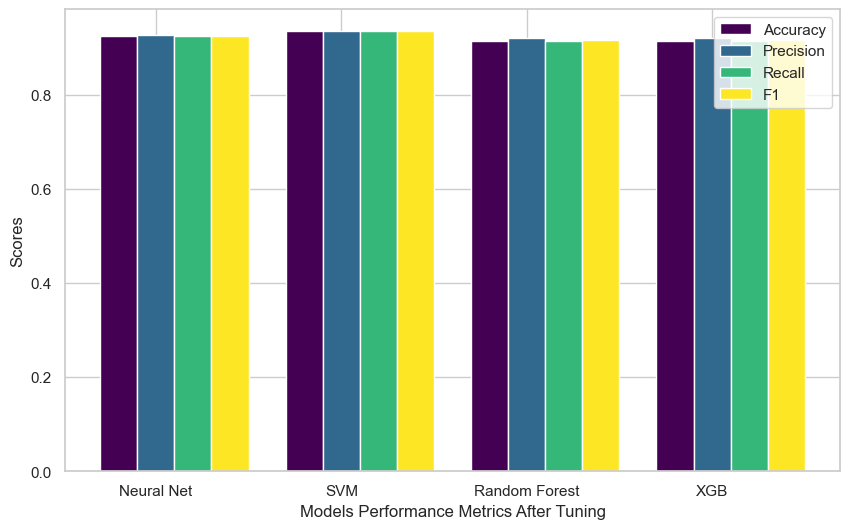

In [130]:
# create data 
x = np.arange(4) 
acc = [accuracy_nn, accuracy_svm, accuracy_rf, accuracy_xgb] 
prec = [precision_nn, precision_svm, precision_rf, precision_xgb] 
rec = [recall_nn, recall_svm, recall_rf, recall_xgb] 
f = [f1_nn, f1_svm, f1_rf, f1_xgb] 
width = 0.2


plt.bar(x-0.2, acc, width, color=colors[0]) 
plt.bar(x, prec, width, color=colors[1]) 
plt.bar(x+0.2, rec, width, color=colors[2]) 
plt.bar(x+0.4, f, width, color=colors[3]) 
plt.xticks(x, ['Neural Net', 'SVM', 'Random Forest', 'XGB']) 
plt.xlabel("Models Performance Metrics After Tuning") 
plt.ylabel("Scores") 
plt.legend(["Accuracy", "Precision", "Recall", "F1"]) 
plt.show()

In [78]:
myTable = PrettyTable(["Model Name", "Accuracy", "Precision", "Recall", "F1"]) 

myTable.add_row(["Neural Net", accuracy_nn, precision_nn, recall_nn, f1_nn ]) 
myTable.add_row(["SVM", accuracy_svm, precision_svm, recall_svm, f1_svm]) 
myTable.add_row(["Random Forest", accuracy_rf, precision_rf, recall_rf, f1_rf]) 
myTable.add_row(["XGB", accuracy_xgb, precision_xgb, recall_xgb, f1_xgb])

print(myTable)

+---------------+--------------------+--------------------+--------------------+--------------------+
|   Model Name  |      Accuracy      |     Precision      |       Recall       |         F1         |
+---------------+--------------------+--------------------+--------------------+--------------------+
|   Neural Net  | 0.9247311827956989 | 0.927636476426799  | 0.9247311827956989 | 0.9260028050490884 |
|      SVM      | 0.9354838709677419 | 0.9354838709677419 | 0.9354838709677419 | 0.9354838709677419 |
| Random Forest | 0.9139784946236559 | 0.9208423263139475 | 0.9139784946236559 | 0.9167493796526055 |
|      XGB      | 0.9139784946236559 | 0.9208423263139475 | 0.9139784946236559 | 0.9167493796526055 |
+---------------+--------------------+--------------------+--------------------+--------------------+


Precision/Recall score for Neural Net is : 0.955
Precision/Recall score for Neural Net CV is : 0.978
Precision/Recall score for SVM is : 0.898
Precision/Recall score for SVM CV is : 0.979
Precision/Recall score for Random Forest is : 0.995
Precision/Recall score for Random Forest CV is : 0.977
Precision/Recall score for XGBoost is : 0.938
Precision/Recall score for XGBoost CV is : 0.977


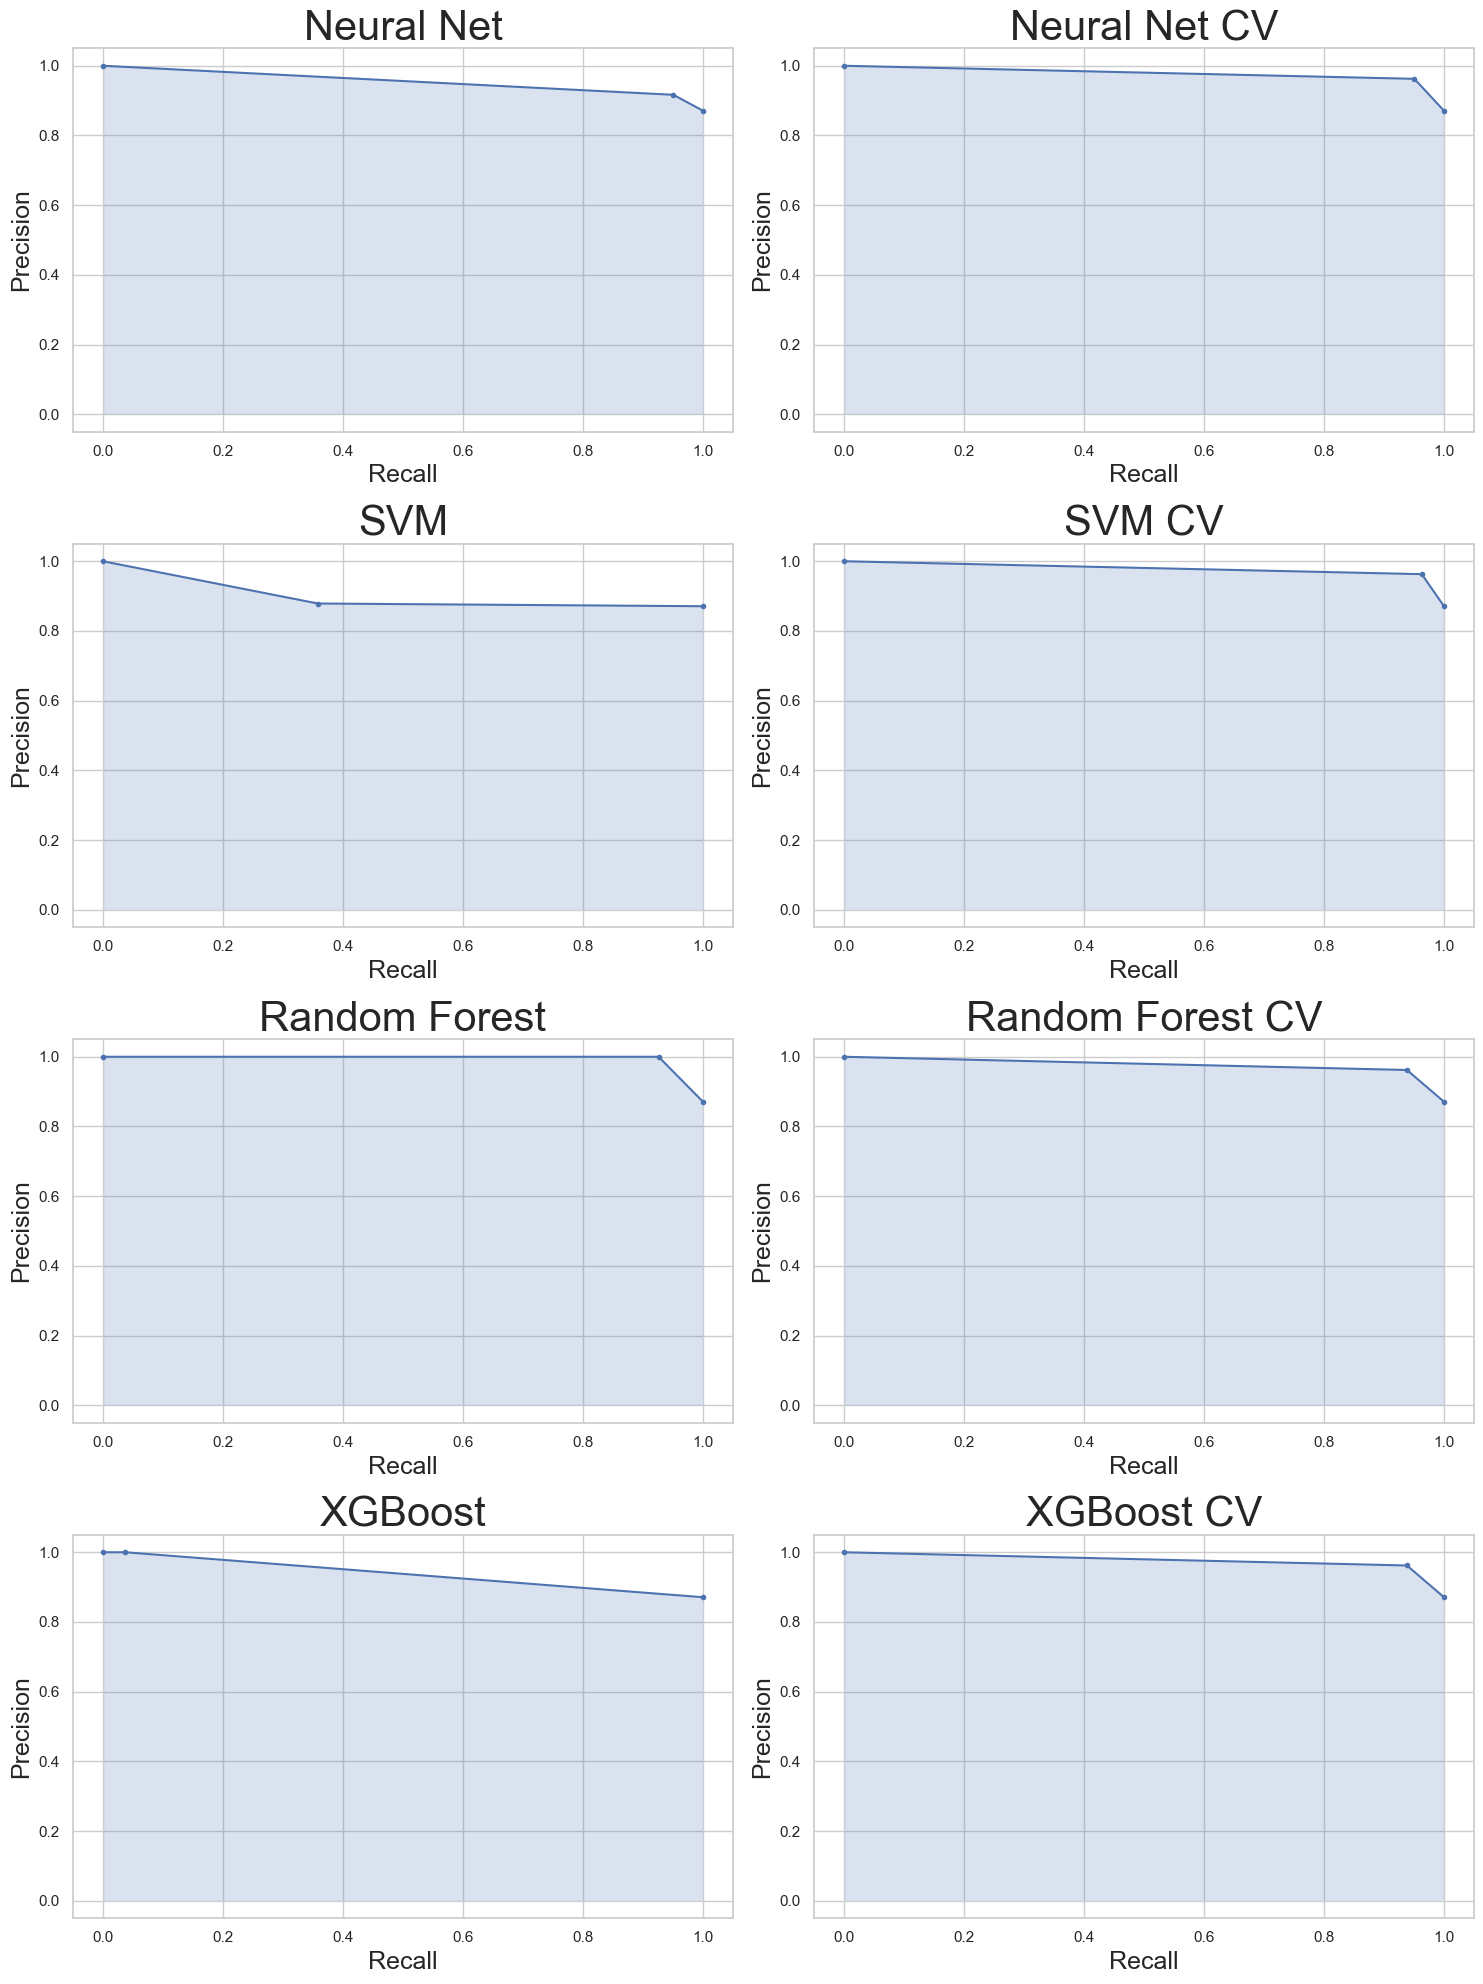

In [87]:
def precision_recall():
    models = ['Neural Net', 'Neural Net CV', 'SVM', 'SVM CV', 'Random Forest', 
              'Random Forest CV', 'XGBoost', 'XGBoost CV']
    
    pred_val = [y_pred_nn, y_pred_nn_cv, y_pred_svm, y_pred_svm_cv, 
                y_pred_rf, y_pred_rf_cv, y_pred_xgb, y_pred_xgb_cv]
    
    f, aa = plt.subplots(nrows=4, ncols=2, figsize=(15, 20))
    for i, m, p in zip(aa.flatten(), models, pred_val):
        precision, recall, thresholds = precision_recall_curve(y_test, p)
        i.plot(recall, precision, marker='.')
        i.fill_between(recall, precision, alpha=0.2)
        i.set_xlabel("Recall", fontsize=18)
        i.set_ylabel("Precision", fontsize=18)
        i.set_title(m, fontsize=30)
        pr_score = auc(recall, precision)
        print('Precision/Recall score for', m, 'is : {:.3f}'.format(pr_score))
    plt.tight_layout()
    plt.show()

precision_recall()

SVM CV and Neural Net CV have the highest performance

## Stacking

In [51]:
svm_classifier = SVC(random_state=42)
mlp_classifier = MLPClassifier(max_iter=2000, random_state=42)


svm_param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [0.1, 0.01, 0.001],
    'kernel': ['rbf', 'linear']
}

mlp_param_grid = {
    'mlp__hidden_layer_sizes': [(100, 50), (50, 25)],
    'mlp__solver': ['adam', 'sgd'],
    'mlp__alpha': [0.0001, 0.001, 0.01],
    'mlp__learning_rate': ['constant', 'adaptive'],
}


mlp_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('mlp', mlp_classifier) 
])


estimators = [
    ('svm', SVC(random_state=42)),
    ('mlp', mlp_pipeline)
]

stacking_classifier = StackingClassifier(estimators=estimators, final_estimator=SVC())


stacking_classifier.fit(X_train, y_train)


y_pred_stacking = stacking_classifier.predict(X_test)

accuracy_st = accuracy_score(y_test, y_pred_stacking)
precision_st = precision_score(y_test, y_pred_stacking, average='weighted')
recall_st = recall_score(y_test, y_pred_stacking, average='weighted')
f1_st = f1_score(y_test, y_pred_stacking, average='weighted')

In [52]:
myTable = PrettyTable(["Model Name", "Accuracy", "Precision", "Recall", "F1"]) 

myTable.add_row(["Stacking", accuracy_st, precision_st, recall_st, f1_st ]) 

print(myTable)

+------------+--------------------+-------------------+--------------------+--------------------+
| Model Name |      Accuracy      |     Precision     |       Recall       |         F1         |
+------------+--------------------+-------------------+--------------------+--------------------+
|  Stacking  | 0.9247311827956989 | 0.927636476426799 | 0.9247311827956989 | 0.9260028050490884 |
+------------+--------------------+-------------------+--------------------+--------------------+


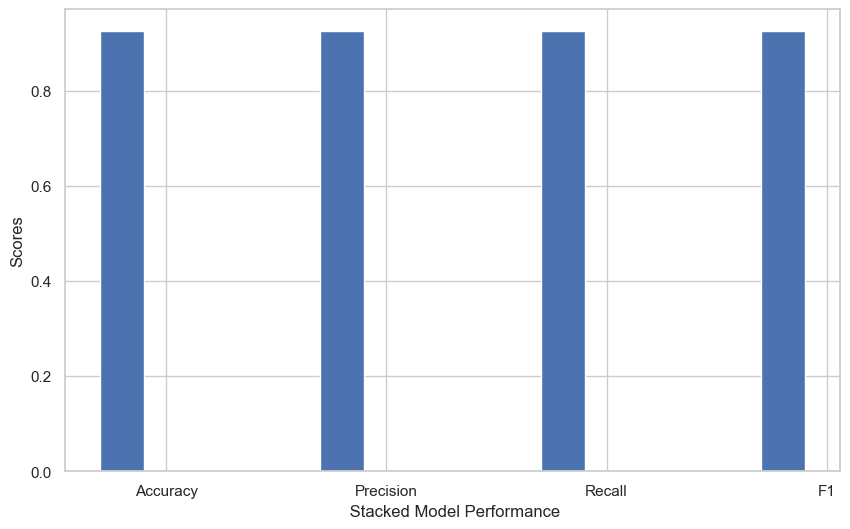

In [65]:
x = np.arange(4) 
acc = [accuracy_st] 
prec = [precision_st] 
rec = [recall_st] 
f = [f1_st] 
width = 0.2

plt.bar(x-0.2, acc, width) 
plt.xticks(x, ["Accuracy", "Precision", "Recall", "F1"]) 
plt.xlabel(" Stacked Model Performance") 
plt.ylabel("Scores") 
plt.show()

Precision/Recall score for Stacked is : 0.978


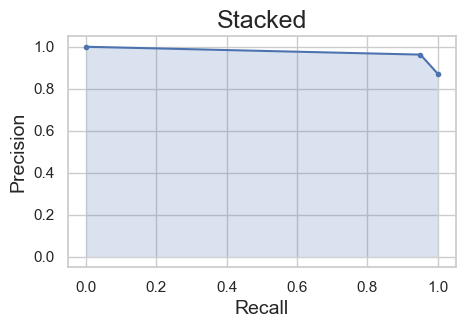

In [93]:
def precision_recall(y_test, y_pred_stacking):
    model = 'Stacked'
    precision, recall, _ = precision_recall_curve(y_test, y_pred_stacking)
    
    plt.figure(figsize=(5, 3))
    plt.plot(recall, precision, marker='.')
    plt.fill_between(recall, precision, alpha=0.2)
    plt.xlabel("Recall", fontsize=14)
    plt.ylabel("Precision", fontsize=14)
    plt.title(model, fontsize=18)
    pr_score = auc(recall, precision)
    print('Precision/Recall score for', model, 'is : {:.3f}'.format(pr_score))
    plt.show()

precision_recall(y_test, y_pred_stacking)